<a href="https://colab.research.google.com/github/YuliaLoburets/ML_learning/blob/main/HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



Посилання на файл:

https://github.com/YuliaLoburets/ML_learning/blob/main/process_bank_churn.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/ML')
from process_bank_churn import preprocess_data

In [ ]:
raw_df = pd.read_csv('drive/MyDrive/ML/train.csv')
raw_df.drop(columns=['Surname','id','CustomerId'], inplace=True)

In [ ]:
raw_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [ ]:
X_train, train_targets, X_val, val_targets, input_cols, scaler, encoder = preprocess_data(raw_df, 'Exited')

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.320187,-0.944682,-1.447264,1.475464,-1.108193,0.515062,1.016977,0.569450,1.0,0.0,0.0,0.0,1.0
1,0.347838,0.161227,-1.087792,2.254434,-1.108193,0.515062,-0.983306,0.603803,1.0,0.0,0.0,1.0,0.0
2,0.638166,-0.330288,0.350096,1.223831,0.769304,0.515062,-0.983306,1.238026,0.0,1.0,0.0,0.0,1.0
3,0.140460,2.495924,-1.806736,-0.717950,0.769304,-1.941514,1.016977,-1.457116,0.0,0.0,1.0,0.0,1.0
4,0.665816,-2.050591,-0.728320,-0.717950,0.769304,0.515062,1.016977,0.670629,1.0,0.0,0.0,0.0,1.0


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, f1_score, accuracy_score)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)
train_preds = model.predict(X_train)
train_proba = model.predict_proba(X_train)[:,1].astype('int')
val_preds = model.predict(X_val)
val_proba = model.predict_proba(X_val)[:,1].astype('int')

In [ ]:
def plot_roc_auc(prediction,targets, df):
  fpr, tpr, thresholds = roc_curve(targets,  prediction)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {df} data')
  plt.legend(loc="lower right")
  plt.show()
  accuracy = accuracy_score(targets, (prediction > 0.5).astype(int))
  print(f'Accuracy score for {df} data: {accuracy}')

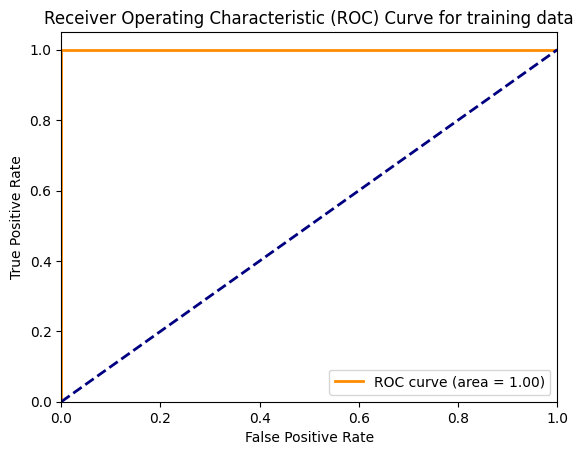

Accuracy score for training data: 1.0


In [ ]:
plot_roc_auc(prediction = train_proba, targets=train_targets, df='training')

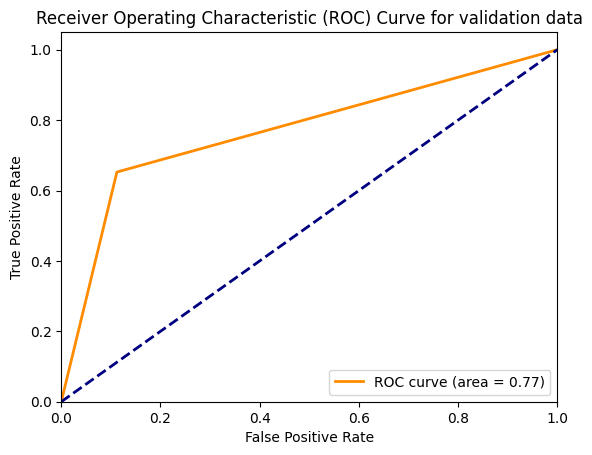

Accuracy score for validation data: 0.84


In [ ]:
plot_roc_auc(prediction = val_proba,targets=val_targets, df='validation')

Дана модель перенавчена.

In [ ]:
print(f'The model depth: {model.tree_.max_depth}')

The model depth: 26


In [ ]:
from sklearn.tree import plot_tree, export_text

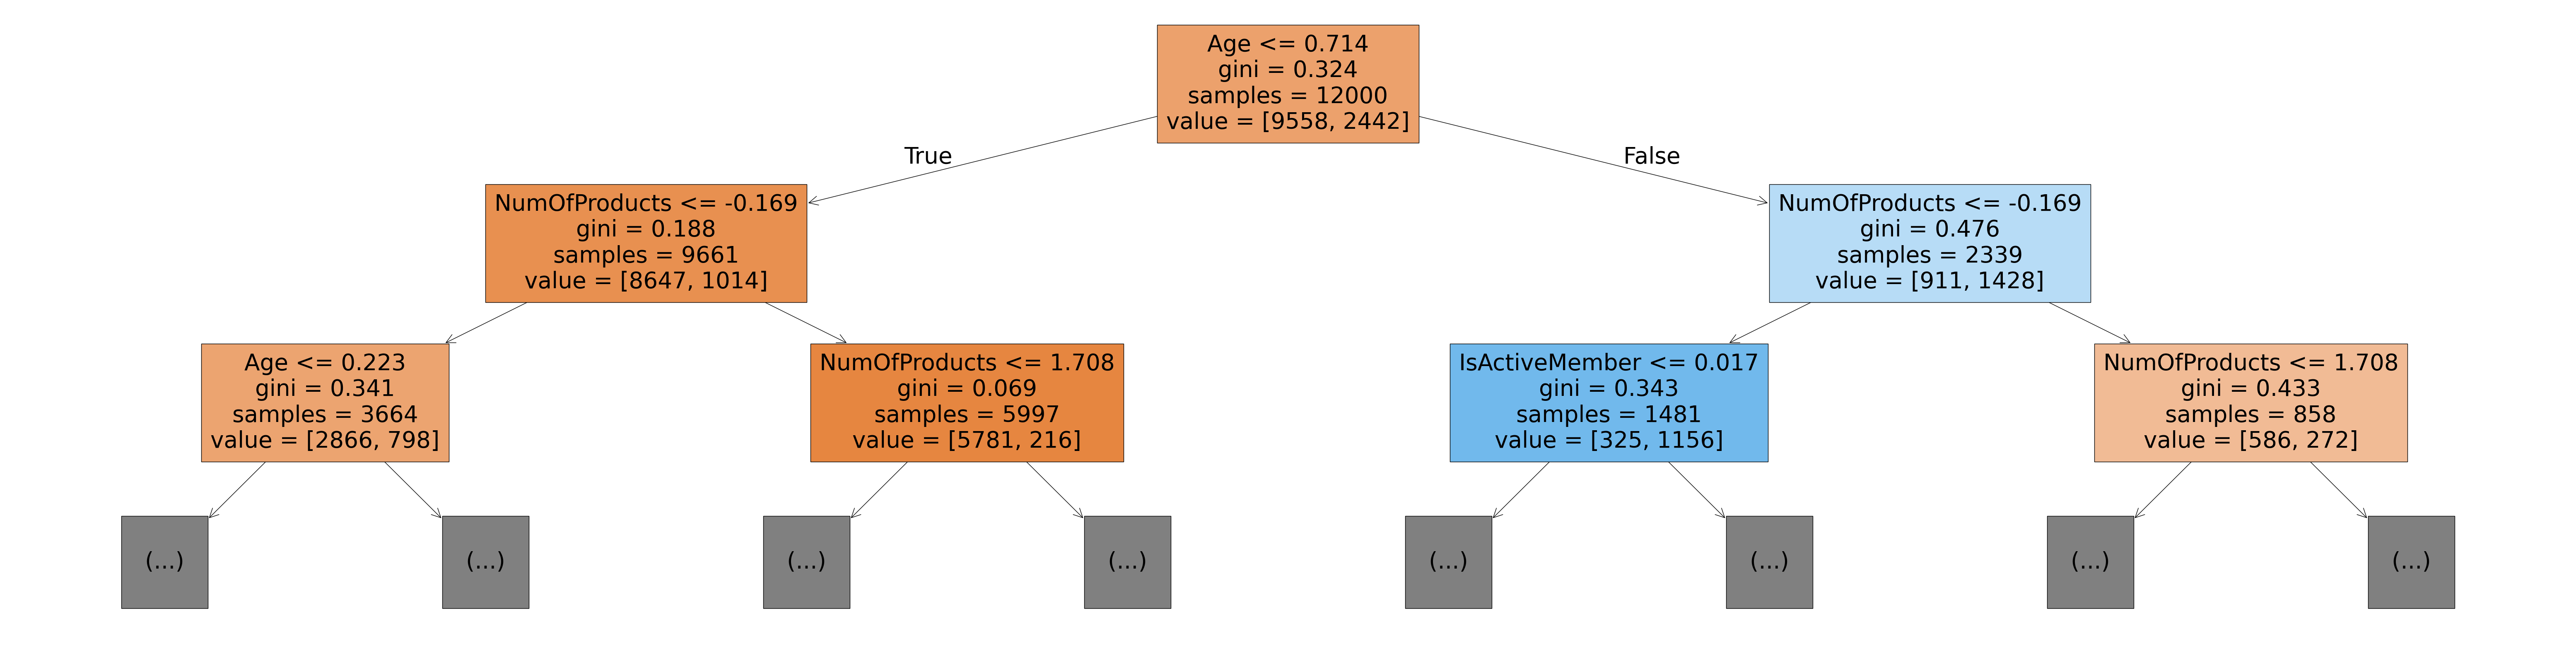

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

Згідно даного графа можна визначити, що найбільш впливовими ознаками є  Age, NumOfProducts

In [ ]:
model.feature_importances_.round(2)

array([0.12, 0.36, 0.05, 0.08, 0.17, 0.01, 0.03, 0.12, 0.01, 0.01, 0.01,
       0.01, 0.01])

In [ ]:
importance_df = pd.DataFrame({'feature': X_train.columns,
                              'importance': model.feature_importances_.round(2)}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
1,Age,0.36
4,NumOfProducts,0.17
0,CreditScore,0.12
7,EstimatedSalary,0.12
3,Balance,0.08
2,Tenure,0.05
6,IsActiveMember,0.03
5,HasCrCard,0.01
8,Geography_France,0.01
9,Geography_Germany,0.01


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [ ]:
model_2 = DecisionTreeClassifier(random_state=42, max_depth=15, criterion='gini', min_samples_split=2)
model_2.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [ ]:
preds_train = model_2.predict(X_train)
proba_train = model_2.predict_proba(X_train)[:,1].astype('int')
preds_val = model_2.predict(X_val)
proba_val = model_2.predict_proba(X_val)[:,1].astype('int')

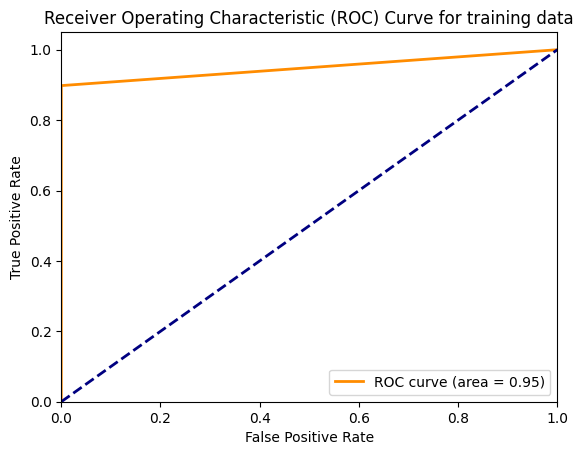

Accuracy score for training data: 0.97925


In [ ]:
plot_roc_auc(prediction = proba_train,targets=train_targets, df='training')

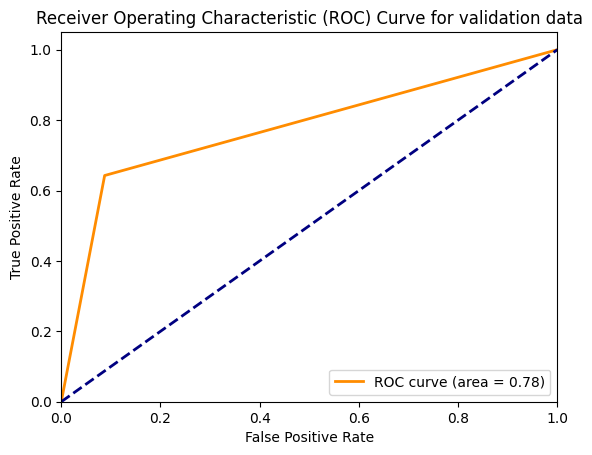

Accuracy score for validation data: 0.8576666666666667


In [ ]:
plot_roc_auc(prediction = proba_val,targets=val_targets, df='validation')

При даних параметрах трохи вдалось зменшити значення AUC на тренувальних даних та збільшити значення AUC на валідаційних даних

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [ ]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.160417,0.177333
1,2,0.134250,0.139000
2,3,0.118500,0.125333
3,4,0.112750,0.118000
4,5,0.104750,0.112667
5,6,0.095917,0.109000
6,7,0.092250,0.110333
7,8,0.081833,0.109333
8,9,0.073667,0.114667
9,10,0.064167,0.117333


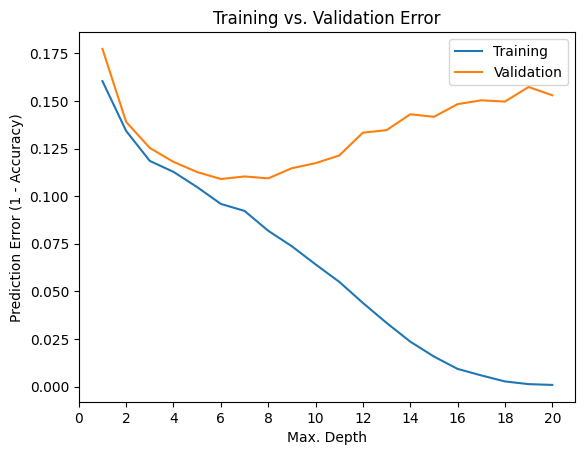

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

Бачимо, що найбільш оптимальною глибиною дерева є глибина 6, коли помилка на валідаційних даних є найменшою.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [ ]:
model_3 = DecisionTreeClassifier(max_depth=6, random_state=42)
model_3.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
test_df = pd.read_csv('drive/MyDrive/ML/test.csv')
test_df.drop(columns=['Surname','id','CustomerId'], inplace=True)

In [ ]:
test_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [ ]:
from process_bank_churn import preprocess_new_data

In [ ]:
X_test = preprocess_new_data(test_df,input_cols, scaler,encoder)
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.034678,-0.944682,-1.087792,1.720173,-1.108193,0.515062,1.016977,0.875226,0.0,1.0,0.0,0.0,1.0
1,-1.490909,0.161227,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.109098,1.0,0.0,0.0,0.0,1.0
2,0.651991,0.652742,1.069040,-0.717950,0.769304,0.515062,-0.983306,0.850584,1.0,0.0,0.0,0.0,1.0
3,0.804068,0.898500,-0.728320,-0.717950,-1.108193,0.515062,1.016977,1.073044,0.0,0.0,1.0,0.0,1.0
4,-0.924077,0.652742,1.069040,-0.717950,0.769304,0.515062,1.016977,0.563521,0.0,0.0,1.0,0.0,1.0


In [ ]:
submission_file = pd.read_csv('drive/MyDrive/ML/sample_submission.csv')

In [ ]:
test_df['Exited'] = model_3.predict_proba(X_test)[:,1]

In [ ]:
submission_file['Exited'] = test_df['Exited']

In [ ]:
submission_file.head()

,id,Exited
0,15000,0.171206
1,15001,0.039422
2,15002,0.015789
3,15003,0.679612
4,15004,0.039422


In [ ]:
file_path = '/content/drive/MyDrive/ML/submission_log_reg_3.csv'
submission_file.to_csv(file_path, index=False)